### Dimensionality Reduction SOM Assignment Solution

Jay Urbain, PhD

#### Objectives:    

- Students understand how neural networks can be used to find lower-dimension representations of data in an unsupervised manner

- **Students can explain the algorithm behind SOMs**

- **Students understand how SOMs can be extending to perform clustering**

- Students understand the theory behind autoencoders

- **Students can apply both of these techniques to an appropriate dataset**

#### References

Referece: 

- Kohonen, Teuvo; Honkela, Timo (2007). "Kohonen Network". Scholarpedia.   
http://www.scholarpedia.org/article/Kohonen_network

- Teuvo Kohonen, The Self-Organizing Map, 1990    
https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1990-Kohonen-PIEEE.pdf

- Self Organizing Maps, The Glowing Python    
https://glowingpython.blogspot.com/2013/09/self-organizing-maps.html

- MiniSOM Github   
https://github.com/JustGlowing/minisom

- Gregory T. Breard, Evaluating Self-Organizing Map Quality Measuresas Convergence Criteria, 2017
https://digitalcommons.uri.edu/cgi/viewcontent.cgi?article=2013&context=theses

- Achraf Khazri, Self Organizing Maps     
https://towardsdatascience.com/self-organizing-maps-1b7d2a84e065

- Abhinav Ralhan, Self Organizing Maps  
https://towardsdatascience.com/self-organizing-maps-ff5853a118d4

- Wikipedia - Self Organizing Maps   
https://en.wikipedia.org/wiki/Self-organizing_map

-  Ultsch, Alfred (2007). "Emergence in Self-Organizing Feature Maps". In Ritter, H.; Haschke, R. (eds.). Proceedings of the 6th International Workshop on Self-Organizing Maps (WSOM '07). Bielefeld, Germany: Neuroinformatics Group. ISBN 978-3-00-022473-7.


### Self Organizing Map (SOM)

A `SOM` is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships in a low-dimensional space.

A `SOM` is trained using unsupervised learning to produce a reduced dimensionality (typically two-dimensional) representation of the input space of the training samples. This low dimensionality representation is called a map. 

`Self-organizing maps` differ from other neural networks as they apply competitive learning as opposed to error-correction learning (such as backpropagation with gradient descent).

`SOMs` use a neighborhood function to preserve the topological properties of the input space to generate the 2D map. Useful for visualization of complex nonlinear data.

The network architecture for SOMs was introduced by Finnish professor Teuvo Kohonen in the 1980s and is sometimes called a Kohonen map or network.

The Kohonen map architecture is fundamentally different in arrangement and motivation than a standard feedforward neural network.

It has been shown that while self-organizing maps with a small number of nodes behave in a way that is similar to K-means, larger self-organizing maps rearrange data in a way that is fundamentally topological in character.

Large SOMs display emergent properties. In maps consisting of thousands of nodes, it is possible to perform cluster operations on the map itself.

#### Architecture

Kohonen networks are sheet-like neural networks, whose neurons are activated by various patterns or classes of patterns in input signals. 

<img src="../images/haykin_som.png" width="300px"/>

Source: https://glowingpython.blogspot.com/2013/09/self-organizing-maps.html 


<img src="../images/250px-Somnbc.png" width="300px"/>

Source: http://www.scholarpedia.org/article/Kohonen_network 

Input neurons present features in the dataset to the map. Each input neuron is connected to each map neuron with a weight. The goal of the map neurons is to present data received on input neurons as two-dimensional data. Input data is  represented as 3D vectors (N inputs, input vector, weight connections to each map neuron). The self-organizing map uses unsupervised learning to cluster that three-dimensional data into a two-dimensional representation.

<img src="../images/0_NDU-Hc3tGz4XZXHh.png" width="400px" />

Source: https://towardsdatascience.com/analyzing-climate-patterns-with-self-organizing-maps-soms-8d4ef322705b  

<img src="../images/1_eehec1ZZ_4vMSe69GTzYCg.png" width="400px" />

Source: https://towardsdatascience.com/self-organizing-maps-1b7d2a84e065

There can be any number of dimensions in the input data, and any number of dimensions for our output (mapping) data. It is important to emphasize that each map neuron is connected to each input neuron and that map neurons are not connected to each other. This makes every map neuron independent of the values of their neighbors.

Each connection still has a weight attached to it, but they are not used in the same way as in feedforward networks. Basically, weights represent the relationship of the mapping neuron with the input vector. Every map neuron can be identified by a unique $(i, j)$ coordinate and weights on their connections are updated based on the values on the input data.

Even though `SOMs` and `neural networks` use similar terms, like neurons, connections and weights, their meaning is conceptually different. 
 

#### Learning Process

`SOMs` use a form of unsupervised learning called `competitive learning`. 

Basically, the input weights to each neuron in the map represent a point in 2D map space, and these weights are used to calculate a distance (similarity) for each input vector. Input samples are presented to the map randomly. The neuron with the set of weights that most closely matches the input samples "wins," and the weights to the winning map neuron are updated to be "closer" to the distribution of the input sample. This process continues until convergence.

Figure: the blue blob is the distribution of the training data, and the small white disc is the current training input vector. At first (left) the `SOM` nodes are arbitrarily positioned in the data space. The node (highlighted in yellow) which is nearest to the training input vector is selected. It is moved towards the training sample, as (to a lesser extent) are its neighbors on the grid. After many iterations the grid tends to approximate the data distribution (right).

<img src="../images/2560px-Somtraining.svg.png" width="600px" />

Source: https://en.wikipedia.org/wiki/Self-organizing_map#cite_note-23 

*Steps:*

- The first step in the learning process is the initialize weights to random values. 

- A random sample from the dataset is used as an input to the network. 

- The network calculates the distance between the input sample features and weights to each neuron.

$$
Distance^2 = \sum_{i=0}^n (input_i - weight_i)^2
$$

- The map neuron with the best result (smallest distance) is called the Best Matching Unit (BMU). This basically means that the input vector can be represented with this mapping neuron. 

As part of the learning procedure:

- the SOM updates the weights of the BMU to be closer to the input sample, and    
- the neighbors of the BMU are also updated so they too are closer to the input sample.

This is how the whole map is "pulled" toward the point in 2D space representing the input sample.

Figure: Training process of SOM on two-dimensional data set

<img src="../images/440px-TrainSOM.gif" width="300px"/>

Source: https://en.wikipedia.org/wiki/Self-organizing_map#cite_note-23

A `radius` for defining the BMU's neighbors is initially set to a large value and reduced in every epoch (learning iteration).

Radius:

$$
\sigma(t)=\sigma_0 e^{-\dfrac{t}{\lambda}}
$$

where $t$ is the current iteration, and $\sigma_0$ is the radius of the map.

$$
\lambda = \dfrac{k}{\sigma_0}
$$

$k$ is the number of iterations. 

This formula utilizes exponential decay to make the radius smaller for each epoch. Every iteration through the data will bring relevant 2D map points closer to the input data. The self-organizing map is iteratively fine-tuned in this way.

When the radius of the current iteration is calculated, weights of all neurons within the radius are updated. The closer the neuron is to the `BMU` the more its weights are changed. 

$$
weight(t + 1) = weight(t) + \eta(t)h(t)(input(t) - weight(t))
$$

$\eta(t)$ represents the learning rate. Similar to the radius formula, it uses an  exponential decay:

$$
\eta(t) = \eta_0 e^{-\dfrac{t}{\lambda}}
$$

The weight of a neuron is modified more if that neuron is closer to the `BMU`. In the formula, that is handled with the neighborhood function $h(t)$. 

$$
h(t) = e^{-\dfrac{distBMU}{2\sigma(t)^2}}
$$

If the neuron is closer to the `BMU`, $distBMU$ is smaller, and $h(t)$ is closer to 1, the weights of the neuron have a greater change. This whole procedure is repeated several epochs.

Learning process summary:

1. Initialize weights

2. Initialize $t=0$

3. Randomly select input vector $x$ from the dataset 

4. Determine the best matching neuron, $i$, `BMU`, from the dataset
$$
argmin_i||x - w_i||
$$

5. Use the radius to adapt the weights of each neuron $n$

$$
w_n = w_n + \eta(t)h(i)(x - w_n)
$$

6. Increment $t$ by $1$

7. If $t<t_{max}$ go to step 3

8. Run additional training epochs until convergence

*Note: There are many variations of the equations and the learning process of self-organizing maps.*

#### Summary

- Self-organizing maps are a very interesting concept and different from the rest of the neural network world. 

- Use unsupervised learning to create a map or a mask for the input data. 

- Provide a very adaptive solution for large or complex, nonlinear data sets. 

- Because of this high adaptivity, they have found application initial applications in speech recognition. 

- Today they are also used in topic modeing, bibliographic classification, image browsing and classification, medical diagnosis, data compression etc.


### Implementation

There are many available implementations of the Self-Organizing Maps for Python available at PyPl. To name the some:

[SimpleSom](https://pypi.org/project/SimpSOM/)

[Kohonen](https://pypi.org/project/kohonen/)

[MiniSOM](https://pypi.org/project/MiniSom/)

The last implementation in the list – MiniSOM is one of the most popular ones. It is a minimalistic, Numpy based implementation of the Self-Organizing Maps and it is very user friendly. It can be installed using pip:

According to the documentation, you can install MiniSOM:

> pip install minisom

or using the downloaded setup:

> git clone https://github.com/JustGlowing/minisom   
> python setup.py install

#### MiniSOM usage example

To use `MiniSom` you need your data organized as a Numpy matrix where each row corresponds to an observation or as list of lists like the following.

Create a data set with 4 features, and 7 examples:

In [4]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.3-cp36-none-any.whl size=7550 sha256=a01ad71de09a9e6cc455001463c3f8c5754df84eeccdc4b296da8637fbe4bd8a
  Stored in directory: /root/.cache/pip/wheels/35/62/79/4d921062c847ee15a3bb3ac2ea984ed401c8b6b2944f08f697
Successfully built minisom


In [0]:
import seaborn as sns
sns.set()

In [0]:
import sys
sys.path.insert(0, '../')

In [0]:
data = [[ 0.80,  0.55,  0.22,  0.03],
        [ 0.82,  0.50,  0.23,  0.03],
        [ 0.80,  0.54,  0.22,  0.03],
        [ 0.80,  0.53,  0.26,  0.03],
        [ 0.79,  0.56,  0.22,  0.03],
        [ 0.75,  0.60,  0.25,  0.03],
        [ 0.77,  0.59,  0.22,  0.03]]      

In the example below, a $6×6$ Self-Organizing Map is created, with the $4$ input nodes since the data set has 4 features. `learning_rate` and radius (`sigma`) are both initialized to 0.5. 

The Self-Organizing Map is trained with the input data for 100 iterations using `train_random`.

In [0]:
from minisom import MiniSom    
som = MiniSom(6, 6, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
som.train_random(data, 100) # trains the SOM with 100 iterations

`MiniSom` implements two types of training. 

- Random training (implemented by the method train_random), where the model is trained picking random samples from your data.   
- Batch training (implemented by the method train_batch), where the samples are picked in the order they are stored.

The weights of the network are randomly initialized by default. Two additional methods are provided to initialize the weights in a data driven fashion: `random_weights_init` and `pca_weights_init`.

Models can be exported and reloaded.

In [0]:
import pickle
som = MiniSom(7, 7, 4)

# ...train the som here

# saving the som in the file som.p
with open('som.p', 'wb') as outfile:
    pickle.dump(som, outfile)

In [0]:
with open('som.p', 'rb') as infile:
    som = pickle.load(infile)

### Digits


In [0]:
import sys
#sys.path.insert(0, '../')

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

In [0]:
import os
directory = 'resulting_images'
if not os.path.exists(directory):
    os.makedirs(directory)

In [12]:
%autoreload 2
from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
print("Training...")
som.train_random(data, 5000, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.1656737642186959
 topographic error: 0.13856427378964942

...ready!


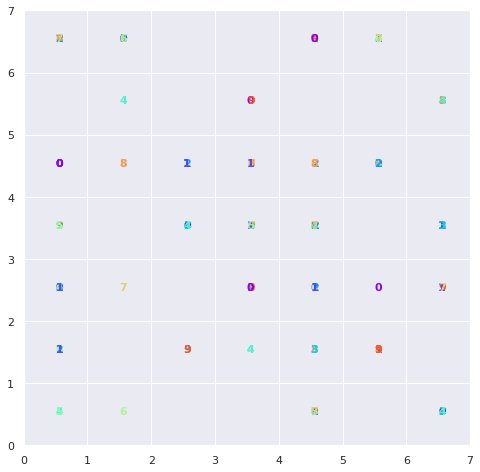

In [23]:

plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig(directory + '/som_digts.png')
plt.show();


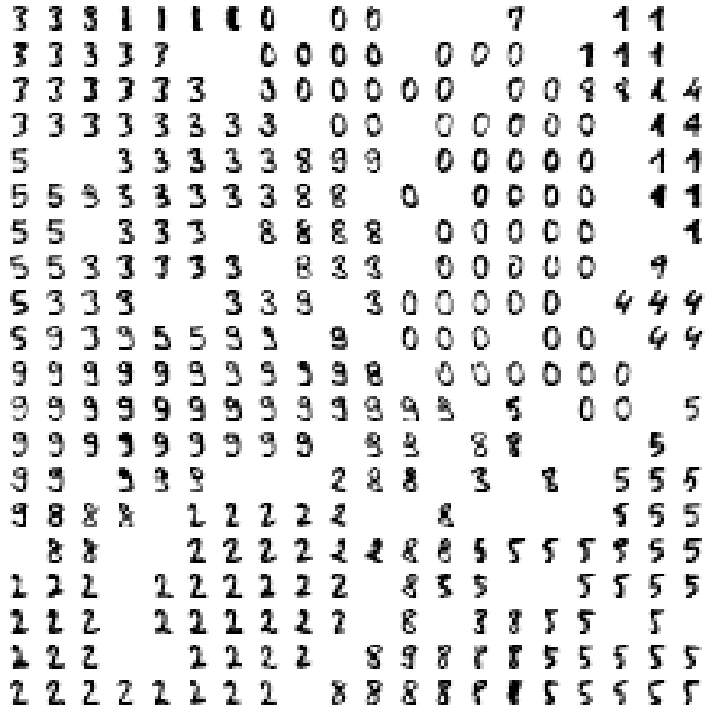

In [14]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig(directory + '/som_digts_imgs.png')
plt.show()


### Quality Measures

For a self-organizing map to be an accurate model, it must preserve the topology and neighborhoods of the input data while also “fitting” the data

Topology is the spatial relation between data points; neighborhoods are clusters of data points that occur in the same region of the input space.  A model that fits the data will describe the underlying relationships without modeling noise.

The two most popular quality measures originally proposed by Kohonen:

#### Quantization Error (QE)

`QE` is a measure of the average distance between the data points and themap nodes to which they are mapped, with smaller values indicating a better fit. $\sigma$ is the learned mapping from the input space to the SOM map.

$$
QE(M) = \dfrac{1}{m} \sum_{i=1}^{n} ||\sigma(x_i) - x_i||
$$

Note that the value reported is on the same scale as the input data and therefore can only be used to compare maps to each other, not as a standalone assessmentof quality.

#### Topographic Error (TE)   

One of the primary goals of the SOM algorithm is to preserve the topological features of the input space in the low dimensional output space.  `TE` is a measure of how well the structure of the input space is modeled by the map.  

Specifically, it evaluates the local discontinuities in the mapping.

`TE` is calculated by finding the best-matching and second-best-matching neuron in themap for  each  input and  then evaluating  the positions.  

If the nodes are next  toeach other, then we say topology has been preserved for this input.  If not, then this is counted as an error.  The total number of errors divided by the total number of data points gives the topographic error of the map.

$$
TE(M) = \dfrac{1}{m} \sum_{i=1}^{n} t(x_i) 
$$
<center>
$t(x) = 0$ if $\mu(x)$ and $\mu'(x)$ are neighbors, $1$ otherwise.
</center>


### Assignment

Hands-on tutorial applying MiniSom on the Iris Dataset and visualizing the result.

Dataset: http://en.wikipedia.org/wiki/Iris_flower_data_set

1) Load the Iris dataset

2) Normalize the data by row using np.norm

3) Build a MiniSom Model. 

4) Visualize the results by labeling the classification for each neuron (provided)

5) Generate a quantization plot (provided)

6) Experiment with different parameterizations of your model.
- size of map, sigma (radius) learning_rate, and neighborhood_function. In each case, observe quantization and topographical errors, and observe well clustered the output classes are.

7) Summarize your observations and identify your top performing model.

#### Load and normalize the data

Load the Iris dataset

In [18]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline
%load_ext autoreload
from sklearn import datasets

# Load from Scikit-learn
iris = datasets.load_iris()
data = iris.data
target = iris.target
data[:10]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [17]:
target.shape

(150,)

Normalize the data by row.

Each row corresponds to a pattern. In this case, we have that each pattern has $4$ dimensions. 

In [16]:
# normalize to unity of each pattern in the data
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x),1,data)
data[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

#### Train a model

1. create a model

    - `sigma` specifies the spread of the Gaussian neighborhood functioon.

    - `learning_rate` specifies the initial learning rate.

2. init weights

3. train

The training algorithm decreases both `sigma` and `learning_rate` as training progresses. This allows rapid initial training of the neural network that is then "fine tuned" as training progresses.


In [44]:
from minisom import MiniSom

# Create a model and initialize weights randomly 
som = MiniSom(7,7,4, sigma=0.9, learning_rate=0.3)

# select initialization method
# go with random weights initialization
som.random_weights_init(data)

print("Training...")
# train with 1000 iterations
som.train_random(data, 1000, verbose=True)  # random training
print("\n...ready!")

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.02392362805420446
 topographic error: 0.02666666666666667

...ready!


After training we have a $7x7$ `SOM` trained on our dataset. 

To visualize the result of the training we can plot the average distance map of the weights on the map and the coordinates of the associated winning neuron for each patter.

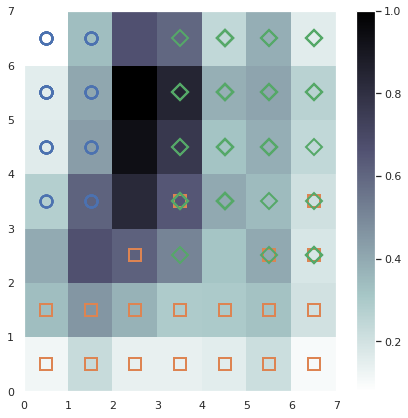

In [30]:
plt.figure(figsize=(7, 7))
# Plot the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

#target = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
# t = np.zeros(len(target), dtype=int)
# t[target == 'setosa'] = 0
# t[target == 'versicolor'] = 1
# t[target == 'virginica'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
plt.savefig('resulting_images/som_iris.png')
plt.show()

Each pattern in the dataset the corresponding winning neuron have been marked. 

Each type of marker represents a class of the iris data. The classes are setosa, versicolor and virginica, respectively represented with red, green and blue colors. 

The average distance map of the weights is used as background. The values are showed in the colorbar on the right. 

As expected from previous studies on this dataset, the patterns are grouped according to the class they belong and a small fraction of Iris virginica is mixed with Iris versicolor.

#### Activation frequencies

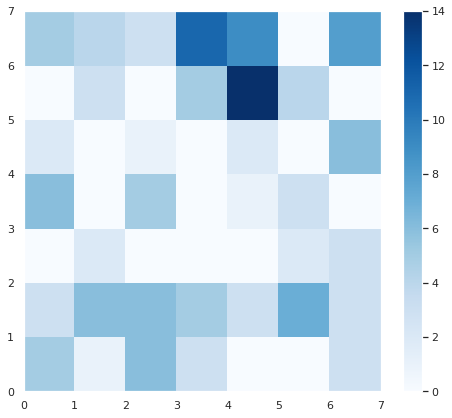

In [26]:
plt.figure(figsize=(8, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show();

#### Quantization error

iteration=9999 status=100.00% error=0.012608235435474615

Text(0.5, 0, 'iteration index')

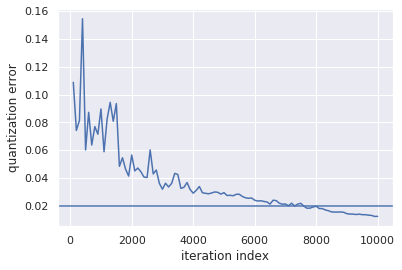

In [33]:
som = MiniSom(7, 7, 4, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)
som.pca_weights_init(data)
max_iter = 10000
q_error_pca_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data)) # This corresponds to train_random() method.
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    if (i+1) % 100 == 0:
        error = som.quantization_error(data)
        q_error_pca_init.append(error)
        iter_x.append(i)
        sys.stdout.write(f'\riteration={i:2d} status={percent:0.2f}% error={error}')
        
plt.plot(iter_x, q_error_pca_init)
plt.axhline(0.02)
plt.ylabel('quantization error')
plt.xlabel('iteration index')

Our optimal Minisom model  with the lowest quantization error and the topographical error is a sigma=0.9 and a learning_rate=0.3.